# *Vanilla* *Autoencoder*
##It has 3 main parts.

> 1). Encoder : Compresses the input data into a lower-dimensional latent representation (also called a bottleneck or latent space).

> 2). Latent Space : The Layer which contains the compressed representation of the input data.

> 3). Decoder :  Reconstructs the original input from the compressed latent representation.









#Encoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


##Dataset

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to a range of [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to 1D vector (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Build the encoder model
encoder = models.Sequential([
    layers.InputLayer(input_shape=(784,)),  # Input layer: 784 (flattened image)
    layers.Dense(512, activation='relu'),  # First hidden layer with 512 neurons
    layers.Dense(256, activation='relu'),  # Second hidden layer with 256 neurons
    layers.Dense(128, activation='relu'),  # Third hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),   # Fourth hidden layer with 64 neurons (bottleneck)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model (just to test the encoder)
encoder.compile(optimizer='adam', loss='mse')


###Latent representation of input data.

In [ ]:
# Take a sample image and flatten it
sample_image = x_train[0]

# Pass the sample through the encoder
latent_rep = encoder.predict(sample_image.reshape(1, 784))

# Print the shape of the latent representation
print("Latent space representation shape:", latent_rep.shape)

# Show the compressed data (latent representation)
print("Latent representation (compressed data):")
print(latent_rep)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
Latent space representation shape: (1, 64)
Latent representation (compressed data):
[[0.06989478 0.         0.20897886 0.         0.         0.0076689
  0.         0.         0.00506263 0.         0.         0.10520703
  0.         0.         0.15696596 0.         0.         0.
  0.39383987 0.         0.12655683 0.24595565 0.14696676 0.
  0.         0.         0.         0.         0.         0.16862269
  0.00750078 0.         0.         0.         0.14818838 0.
  0.11772443 0.         0.         0.18106261 0.         0.
  0.         0.         0.22891007 0.         0.         0.
  0.         0.         0.04310715 0.00220884 0.         0.03645122
  0.26194292 0.         0.         0.         0.0688822  0.
  0.         0.         0.         0.        ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


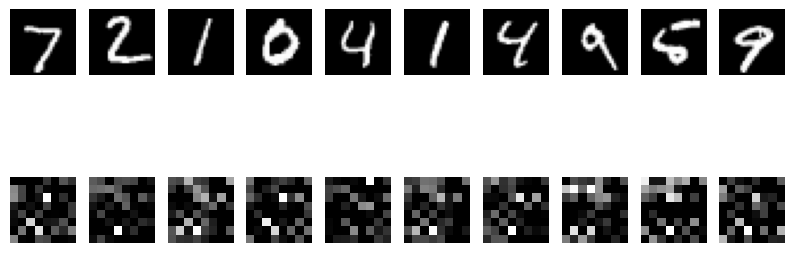

In [ ]:
# Define a smaller model to visualize intermediate features
intermediate_encoder = models.Sequential([
    layers.InputLayer(input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')  # Bottleneck (latent space)
])

# Pass through the intermediate encoder to see the change in shape
intermediate_latent = intermediate_encoder.predict(x_test[:10])  # Visualizing for 10 images

# Plot the original and compressed data
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 10, i+11)
    plt.imshow(intermediate_latent[i].reshape(8, 8), cmap='gray')  # Show compressed data
    plt.axis('off')

plt.show()


#Decoder

In [ ]:
# Build the decoder model
decoder = models.Sequential([
    layers.InputLayer(input_shape=(64,)),  # Latent space input (compressed data from encoder)
    layers.Dense(128, activation='relu'),  # First layer: Expand from 64 to 128 neurons
    layers.Dense(256, activation='relu'),  # Second layer: Expand from 128 to 256 neurons
    layers.Dense(512, activation='relu'),  # Third layer: Expand from 256 to 512 neurons
    layers.Dense(784, activation='sigmoid'),  # Final layer: Output layer with 784 neurons (reconstruction of the image)
])

# Combine both encoder and decoder into an autoencoder model
autoencoder = models.Sequential([encoder, decoder])


#Full Autoencoder

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0821 - val_loss: 0.0261
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0240 - val_loss: 0.0184
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0175 - val_loss: 0.0145
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0144 - val_loss: 0.0127
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - val_loss: 0.0080


In [ ]:
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 64)                  │         574,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 784)                 │         575,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,448,562 (13.16 MB)

 Trainable params: 1,149,520 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,299,042 (8.77 MB)

###Visualisatioin of training of Autoencoder.

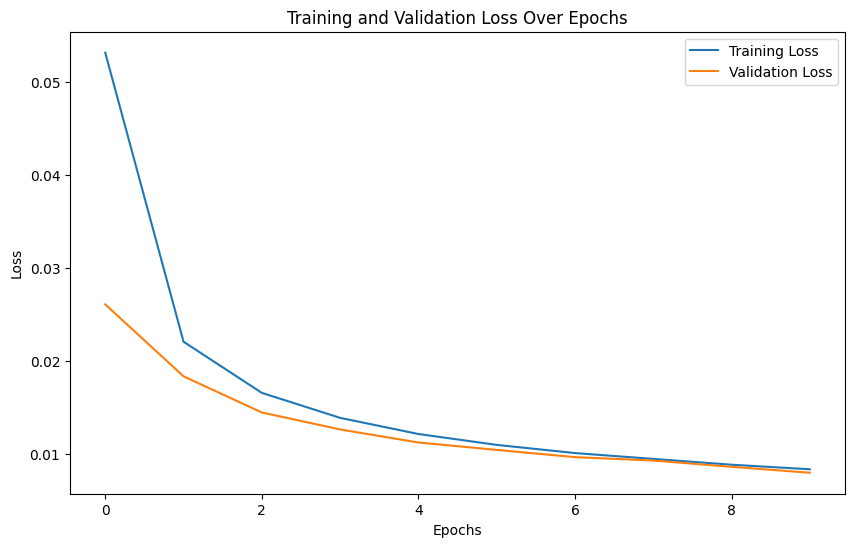

In [ ]:
import matplotlib.pyplot as plt

# Assuming the model is trained and 'history' contains the training history
# You can access loss and validation loss from the 'history' object

plt.figure(figsize=(10, 6))

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding labels and title
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


###Visualisation of Reconstructed images .

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


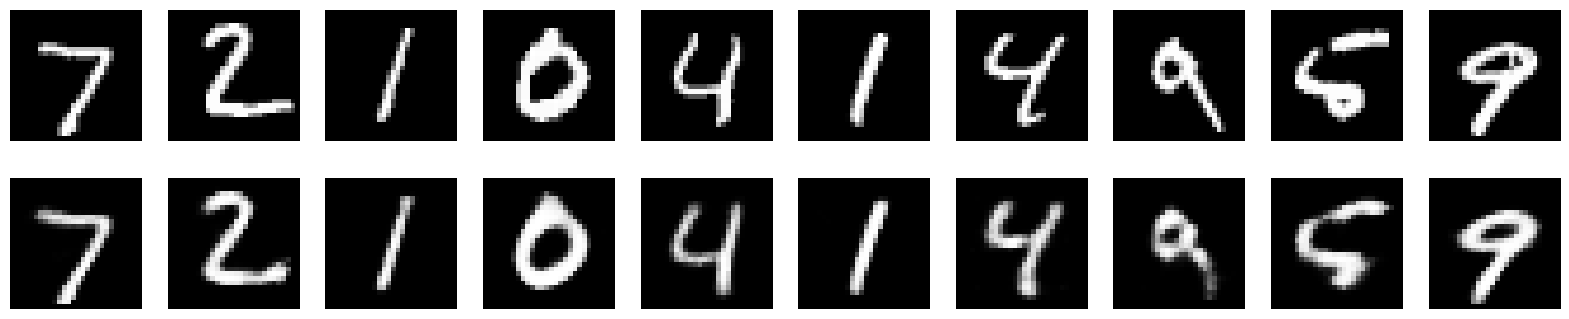

In [ ]:
# Reconstruct the images using the trained autoencoder
reconstructed_images = autoencoder.predict(x_test)

# Display the original and reconstructed images for comparison
n = 10  # number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()
